# Exercise 3: Use a learning rate for updating the weights and bias unit

## 1) Installing Libraries

In [49]:
# !conda install numpy pandas matplotlib --yes

In [50]:
# !conda install watermark

In [51]:
#%load_ext watermark
#%watermark -v -p numpy,pandas,matplotlib

## 2) Loading the Dataset

In [52]:
import pandas as pd

df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [53]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [54]:
X_train

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [55]:
X_train.shape

(20, 2)

In [56]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [57]:
y_train.shape

(20,)

In [58]:
import numpy as np

np.bincount(y_train)

array([10, 10], dtype=int64)

## 3) Visualizing the dataset

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

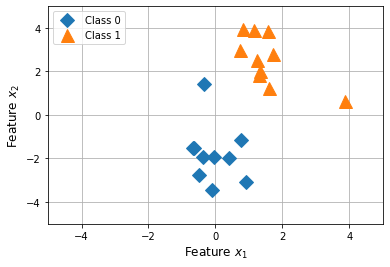

In [60]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

## 4) Implementing the Perceptron

In [61]:
import random

random.uniform(-0.5, 0.5)

-0.2439021446407612

# <font color='red'>Exercise 3.1</font>

<font color='red'>Modify the Perceptron class below such that it uses a so-called *learning rate* for updating the weights and bias unit. The learning rate, let's call it `alpha` is a positive float that scales the weight update. I.e., in the code below, multiply the bias and weight update by a variable `alpha` which defaults to 1.0. (Hint: don't forget to modify the `__init__` method such that it accepts different values for `alpha`.</font>

In [62]:
class Perceptron:
    def __init__(self, num_features,alpha=1.0):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0
        self.alpha=alpha # my code

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias +=self.alpha*error
        for i, _ in enumerate(self.weights):
            self.weights[i] += self.alpha*error * x[i]

        return error

In [63]:
def train(model, all_x, all_y, epochs):

    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)
        # adding early stop from previous exercise
        if error_count==0:
            print("Model has perfectly fitted the training data")
            break
        print(f"Epoch {epoch+1} errors {error_count}")

# <font color='red'>Exercise 3.2</font>

<font color='red'>Now, modify the code below to train the perceptron with a learning rate of `alpha=1.0`. Since we are multiplying the weight and bias update by 1.0, we should get exactly the same results as in the original code.</font>

In [64]:
ppn = Perceptron(num_features=2,alpha=1.0)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=5)

Epoch 1 errors 1
Epoch 2 errors 3
Epoch 3 errors 1
Model has perfectly fitted the training data


# <font color='red'>Exercise 3.3</font>

<font color='red'>What do you observe? Does the perceptron train better or worse?</font>
Since Learning rate is the same as the previous exercise, no changes are observed.

# <font color='red'>Exercise 3.4</font>

<font color='red'>
Now, change the learning rate from `alpha=1.0` to `alpha=0.5` and train the perceptron again. What do you observe?
</font>

It doesn't seem to be any difference between the previous part.

In [65]:
ppn = Perceptron(num_features=2,alpha=0.5)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=5)

Epoch 1 errors 1
Epoch 2 errors 3
Epoch 3 errors 1
Model has perfectly fitted the training data


# <font color='red'>Exercise 3.5</font>

<font color='red'>
Next, update the Perceptron code with small random weights (solution of exercise 2). 
</font>

<br>

<font color='red'>
Then, train the perceptron again with a learning rate of 1.0 and 0.5 and compare the results.
</font>

In [66]:
class Perceptron:
    def __init__(self, num_features,alpha=1.0):
        self.num_features = num_features
        self.weights = [random.uniform(-0.5,0.5) for _ in range(num_features)]
        self.bias = random.uniform(-0.5,0.5)
        self.alpha=alpha

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias +=self.alpha*error
        for i, _ in enumerate(self.weights):
            self.weights[i] += self.alpha*error * x[i]

        return error

In [67]:
def train(model, all_x, all_y, epochs):

    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)
        # adding early stop from previous exercise
        if error_count==0:
            print("Model has perfectly fitted the training data")
            break
        print(f"Epoch {epoch+1} errors {error_count}")


In [68]:
ppn = Perceptron(num_features=2,alpha=1.0)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=5)


Epoch 1 errors 4
Epoch 2 errors 1
Model has perfectly fitted the training data


In [69]:
ppn = Perceptron(num_features=2,alpha=0.5)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=5)

Epoch 1 errors 3
Epoch 2 errors 1
Model has perfectly fitted the training data


## 5) Evaluating the results

In [70]:
def compute_accuracy(model, all_x, all_y):

    correct = 0.0

    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)

In [71]:
train_acc = compute_accuracy(ppn, X_train, y_train)
train_acc

1.0

In [72]:
print(f"Accuracy: {train_acc*100}%")

Accuracy: 100.0%


## 6) Optional: Visualizing the Decision Boundary

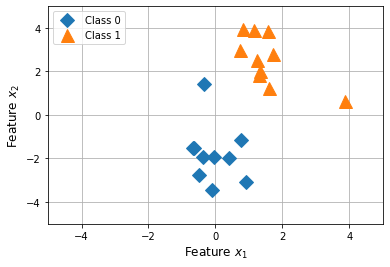

In [73]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [74]:
def plot_boundary(model):

    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

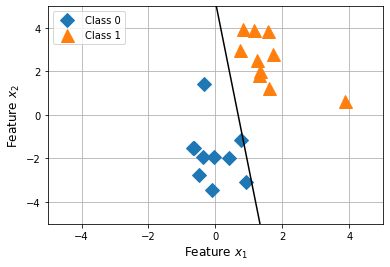

In [75]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)


plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()